# Statistics - HCI IYKRA

Author: Nirta Ika Yunita
<br> Date: 2019, October 25 </br>

## Import library

In [1]:
import numpy as np
import pandas as pd
class color:
   BLUE = '\033[94m'
   END = '\033[0m'

## Load Data

Kontrak 		: nomor kontrak
<br>Tipe_Kendaraan 		: tipe kendaraan yang dibeli
<br>Pekerjaan 		: jenis pekerjaan
<br>Area 			: area kantor tempat kredit diberikan
<br>Tenor 			: jangka waktu hutang yang diajukan (bulan)
<br>Bucket_Collectability 	: keterlambatan membayar hutang (hari)
<br>NPF			: non performing financing
<br>Total_AR 		: jumlah pinjaman yang diterima (juta rupiah)
<br>LTV 			: loan to value (%)
<br>OTR 			: harga beli mobil setelah ditambahkan dengan seluruh pajak dan berbagai dokumen lainnya (puluh juta rupiah)
<br>Age 			: usia (tahun)
<br>Interest_Rate 		: suku bunga bank indonesia (%)
<br>Income 			: pendapatan (juta rupiah)
<br>DP 			: uang muka (juta rupiah)
<br>AF 			: amount financed (juta rupiah)
<br>Tujuan 			: tujuan pembelian
<br>Pendidikan 		: tingkat pendidikan
<br>Tanggungan 		: jumlah tanggungan keluarga
<br>Status 			: status pernikahan peminjam
<br>Gender 			: gender peminjam
<br>Paket 			: paket kredit
<br>Inflasi 		: tingkat inflasi (%)
<br>Segmen 			: segmentasi transaksi

In [2]:
df = pd.read_excel("data loan.xlsx")

In [3]:
df.head()

,Kontrak,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,...,DP,AF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen
0,1,OTHERS,Karyawan,Jawa,12,>90 - 120 hari,Ya,2.763126,100.00,2.76,...,0.0,2.76,Private,Sarjana,Tidak ada,OTHERS,Laki-laki,Ya,3.58,Jasa & Perdagangan
1,2,OTHERS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,2.805000,103.70,2.71,...,0.0,2.81,Private,Others,Tidak ada,MENIKAH,Laki-laki,Ya,3.58,Others
2,3,OTHERS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,3.104000,103.33,3.00,...,0.0,3.10,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,4.17,Others
3,4,OTHERS,Karyawan,Jawa,12,0 - 30 hari,Tidak,4.088100,102.51,3.98,...,0.0,4.08,Private,Sarjana,Ada,OTHERS,Laki-laki,Ya,3.61,Jasa & Perdagangan
4,5,OTHERS,Karyawan,Jawa,12,0 - 30 hari,Tidak,4.607100,102.22,4.50,...,0.0,4.60,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,3.30,Jasa & Perdagangan


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28293 entries, 0 to 28292
Data columns (total 23 columns):
Kontrak                  28293 non-null int64
Tipe_Kendaraan           28293 non-null object
Pekerjaan                28293 non-null object
Area                     28293 non-null object
Tenor                    28293 non-null int64
Bucket_Collectability    28293 non-null object
NPF                      28293 non-null object
Total_AR                 28293 non-null float64
LTV                      28293 non-null float64
OTR                      28293 non-null float64
Age                      28293 non-null int64
Interest_Rate            28293 non-null float64
Income                   28293 non-null int64
DP                       28293 non-null float64
AF                       28293 non-null float64
Tujuan                   28293 non-null object
Pendidikan               28293 non-null object
Tanggungan               28293 non-null object
Status                   28293 non-null obj

In [5]:
df.shape

(28293, 23)

In [6]:
numeric_data = df.select_dtypes(include = [np.number]).columns
categorical_data = df.select_dtypes(exclude = [np.number]).columns

In [7]:
numeric_data

Index(['Kontrak', 'Tenor', 'Total_AR', 'LTV', 'OTR', 'Age', 'Interest_Rate',
       'Income', 'DP', 'AF', 'Inflasi'],
      dtype='object')

In [8]:
categorical_data

Index(['Tipe_Kendaraan', 'Pekerjaan', 'Area', 'Bucket_Collectability', 'NPF',
       'Tujuan', 'Pendidikan', 'Tanggungan', 'Status', 'Gender', 'Paket',
       'Segmen'],
      dtype='object')

## Transformasi Tipe_Kendaraan: Recording

In [9]:
df['Tipe_Kendaraan'].value_counts()

MINIBUS            14440
LCGC                6078
OTHERS              5657
TRUCK & PICK UP     2118
Name: Tipe_Kendaraan, dtype: int64

In [10]:
import copy

In [11]:
df_edit = copy.deepcopy(df)

# df.copy()

In [12]:
df_edit['Tipe_Kendaraan'] = df_edit.Tipe_Kendaraan.map({'MINIBUS' : 'MINIBUS',
                                                        'LGC' : 'NONMINIBUS',
                                                        'OTHERS' : 'NONMINIBUS',
                                                        'TRUCK & PICK UP' : 'NONMINIBUS'})

# df_edit['Tipe_Kendaraan'] = df_edit['Tipe_Kendaraan'].apply(lambda x: 'MINIBUS' if x == 'MINIBUS' else 'NONMINIBUS')

In [13]:
df_edit['Tipe_Kendaraan'].value_counts()

MINIBUS       14440
NONMINIBUS     7775
Name: Tipe_Kendaraan, dtype: int64

In [14]:
df_edit.head()

,Kontrak,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,...,DP,AF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen
0,1,NONMINIBUS,Karyawan,Jawa,12,>90 - 120 hari,Ya,2.763126,100.00,2.76,...,0.0,2.76,Private,Sarjana,Tidak ada,OTHERS,Laki-laki,Ya,3.58,Jasa & Perdagangan
1,2,NONMINIBUS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,2.805000,103.70,2.71,...,0.0,2.81,Private,Others,Tidak ada,MENIKAH,Laki-laki,Ya,3.58,Others
2,3,NONMINIBUS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,3.104000,103.33,3.00,...,0.0,3.10,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,4.17,Others
3,4,NONMINIBUS,Karyawan,Jawa,12,0 - 30 hari,Tidak,4.088100,102.51,3.98,...,0.0,4.08,Private,Sarjana,Ada,OTHERS,Laki-laki,Ya,3.61,Jasa & Perdagangan
4,5,NONMINIBUS,Karyawan,Jawa,12,0 - 30 hari,Tidak,4.607100,102.22,4.50,...,0.0,4.60,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,3.30,Jasa & Perdagangan


In [15]:
df_edit.describe()

,Kontrak,Tenor,Total_AR,LTV,OTR,Age,Interest_Rate,Income,DP,AF,Inflasi
count,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000
mean,14147.000000,45.104867,214.777125,81.146981,204.385958,40.680133,13.741759,20.449334,59.117309,163.551610,5.531061
std,8167.629919,13.281078,88.386433,14.986763,79.938138,9.564789,3.517159,115.608090,40.830083,64.204471,1.797010
min,1.000000,12.000000,1.401000,5.110000,1.690000,19.000000,0.000000,1.000000,0.000000,1.390000,3.210000
25%,7074.000000,36.000000,156.321600,77.870000,157.800000,34.000000,11.190000,9.000000,37.670000,122.480000,3.830000
50%,14147.000000,48.000000,201.120000,83.830000,187.700000,40.000000,13.450000,15.000000,47.700000,153.230000,5.310000
75%,21220.000000,60.000000,266.207999,89.360000,231.050000,48.000000,16.210000,20.000000,67.960000,193.310000,7.250000
max,28293.000000,60.000000,1854.341300,111.830000,1508.400000,82.000000,27.400000,10000.000000,721.350000,1312.810000,8.790000


In [16]:
df_edit[categorical_data].describe()

,Tipe_Kendaraan,Pekerjaan,Area,Bucket_Collectability,NPF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Segmen
count,22215,28293,28293,28293,28293,28293,28293,28293,28293,28293,28293,28293
unique,2,3,3,5,2,2,2,2,2,2,2,2
top,MINIBUS,Karyawan,Jawa,0 - 30 hari,Tidak,Private,Others,Tidak ada,OTHERS,Laki-laki,Tidak,Jasa & Perdagangan
freq,14440,13717,15677,12432,14373,24877,16033,15765,14255,20904,15961,16020


## Transformasi Area : Dummy

In [17]:
df_edit['Area'].value_counts()

Jawa        15677
Sumatera     9872
Others       2744
Name: Area, dtype: int64

In [18]:
D_Area = pd.get_dummies(df_edit['Area'], prefix = 'Area')

In [19]:
D_Area.head()

,Area_Jawa,Area_Others,Area_Sumatera
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
D_Area_Jawa = D_Area.drop('Area_Jawa', axis = 1)

In [21]:
D_Area_Jawa.head()

,Area_Others,Area_Sumatera
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [22]:
df_edit = pd.concat([df_edit, D_Area_Jawa], axis = 1)

In [23]:
df_edit.head()

,Kontrak,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,...,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen,Area_Others,Area_Sumatera
0,1,NONMINIBUS,Karyawan,Jawa,12,>90 - 120 hari,Ya,2.763126,100.00,2.76,...,Private,Sarjana,Tidak ada,OTHERS,Laki-laki,Ya,3.58,Jasa & Perdagangan,0,0
1,2,NONMINIBUS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,2.805000,103.70,2.71,...,Private,Others,Tidak ada,MENIKAH,Laki-laki,Ya,3.58,Others,0,0
2,3,NONMINIBUS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,3.104000,103.33,3.00,...,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,4.17,Others,0,0
3,4,NONMINIBUS,Karyawan,Jawa,12,0 - 30 hari,Tidak,4.088100,102.51,3.98,...,Private,Sarjana,Ada,OTHERS,Laki-laki,Ya,3.61,Jasa & Perdagangan,0,0
4,5,NONMINIBUS,Karyawan,Jawa,12,0 - 30 hari,Tidak,4.607100,102.22,4.50,...,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,3.30,Jasa & Perdagangan,0,0


## Sisipan: Merubah nilai dengan fungsi numpy.where()

In [24]:
np.where(df_edit['Area'] == 'Jawa', )

(array([    0,     1,     2, ..., 28286, 28287, 28292], dtype=int64),)

In [25]:
np.where(df_edit['Area'] == 'Jawa', 'Jawa', 'Luar Jawa')

array(['Jawa', 'Jawa', 'Jawa', ..., 'Luar Jawa', 'Luar Jawa', 'Jawa'],
      dtype='<U9')

## Diskretisasi LTV

LTV is Loan to Value (%)

In [26]:
diskret_LTV = pd.cut(df_edit.LTV, 5)

# Ini artinya dibagi menjadi 5, binning = diskretisasi

In [27]:
diskret_LTV.head()

0    (90.486, 111.83]
1    (90.486, 111.83]
2    (90.486, 111.83]
3    (90.486, 111.83]
4    (90.486, 111.83]
Name: LTV, dtype: category
Categories (5, interval[float64]): [(5.003, 26.454] < (26.454, 47.798] < (47.798, 69.142] < (69.142, 90.486] < (90.486, 111.83]]

## Transformasi Income: Standardisasi

In [28]:
df_edit.describe()['Income']

count    28293.000000
mean        20.449334
std        115.608090
min          1.000000
25%          9.000000
50%         15.000000
75%         20.000000
max      10000.000000
Name: Income, dtype: float64

In [29]:
standardized_Income = (df_edit['Income'] - df_edit['Income'].mean()) / df_edit['Income'].std()

In [30]:
standardized_Income.head()

0   -0.090386
1   -0.047136
2   -0.003887
3   -0.047136
4   -0.003887
Name: Income, dtype: float64

In [31]:
df.Income.head()

0    10
1    15
2    20
3    15
4    20
Name: Income, dtype: int64

In [32]:
standardized_Income.std()

0.9999999999999594

In [33]:
df.Income.std()

115.60808970422566

In [34]:
from matplotlib import pyplot as plt

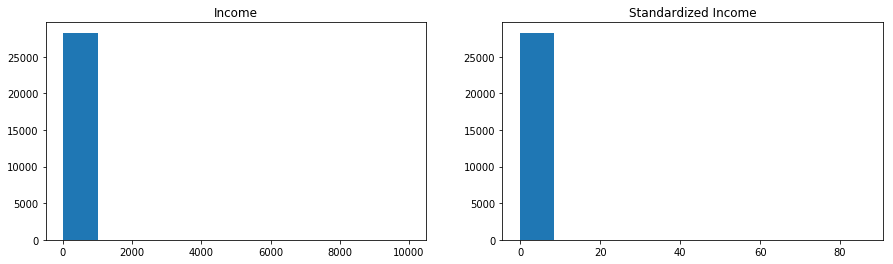

In [35]:
# Visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax1.hist(df_edit['Income'])
ax1.set_title('Income')

ax2.hist(standardized_Income)
ax2.set_title('Standardized Income')

plt.show()

In [36]:
ln_Income = np.log(df_edit.Income)
ln_Income.head()

0    2.302585
1    2.708050
2    2.995732
3    2.708050
4    2.995732
Name: Income, dtype: float64

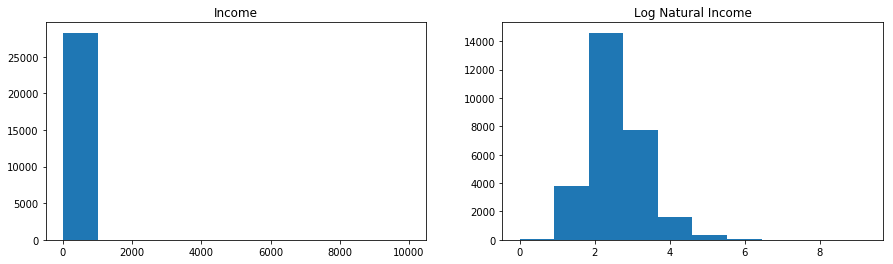

In [37]:
# Visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax1.hist(df_edit['Income'])
ax1.set_title('Income')

ax2.hist(ln_Income)
ax2.set_title('Log Natural Income')

plt.show()

## Normalisasi Income

In [38]:
normalized_Income = (df_edit['Income'] - df_edit['Income'].min()) / (df_edit['Income'].max() - df_edit['Income'].min())
normalized_Income.head()

0    0.0009
1    0.0014
2    0.0019
3    0.0014
4    0.0019
Name: Income, dtype: float64

In [39]:
normalized_Income.describe()

count    28293.000000
mean         0.001945
std          0.011562
min          0.000000
25%          0.000800
50%          0.001400
75%          0.001900
max          1.000000
Name: Income, dtype: float64

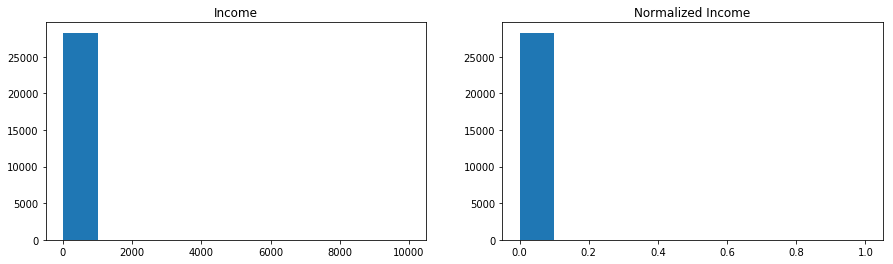

In [40]:
# Visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax1.hist(df_edit['Income'])
ax1.set_title('Income')

ax2.hist(normalized_Income)
ax2.set_title('Normalized Income')

plt.show()

## Mendeteksi Outliers

### Z-Score

In [41]:
z_Income = copy.deepcopy(standardized_Income)

In [42]:
[np.abs(z_Income) > 3]

[0        False
 1        False
 2        False
 3        False
 4        False
 5        False
 6        False
 7        False
 8        False
 9        False
 10       False
 11       False
 12       False
 13       False
 14       False
 15       False
 16       False
 17       False
 18       False
 19       False
 20       False
 21       False
 22       False
 23       False
 24       False
 25       False
 26       False
 27       False
 28       False
 29       False
          ...  
 28263    False
 28264    False
 28265    False
 28266    False
 28267    False
 28268    False
 28269    False
 28270    False
 28271    False
 28272    False
 28273    False
 28274    False
 28275    False
 28276    False
 28277    False
 28278    False
 28279    False
 28280    False
 28281    False
 28282    False
 28283    False
 28284    False
 28285    False
 28286    False
 28287    False
 28288    False
 28289    False
 28290    False
 28291    False
 28292    False
 Name: Income, Length: 2

In [43]:
df_edit[['Kontrak', 'Income']][np.abs(z_Income) > 3].head()

,Kontrak,Income
4559,4560,1500
4611,4612,1000
4898,4899,500
4899,4900,500
4943,4944,500


In [44]:
Q1_Income = df_edit['Income'].quantile(0.25)
Q3_Income = df_edit['Income'].quantile(0.75)
IQR_Income = Q3_Income - Q1_Income

In [45]:
df_edit[['Kontrak', 'Income']][(df_edit.Income < (Q1_Income - 1.5 * IQR_Income)) |
                               (df_edit.Income > (Q3_Income + 1.5 * IQR_Income))].head()

,Kontrak,Income
86,87,50
126,127,100
127,128,60
187,188,50
204,205,40


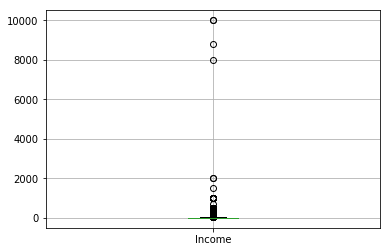

In [46]:
df_edit.boxplot(column = 'Income')
plt.show()

## Hypothesis Testing

Menguji perbedaan rata-rata income antara kelompok NPF dan tidak NPF. Gunakan level signifikansi sebesar 5%.

In [47]:
from scipy.stats import ttest_ind

In [48]:
x1 = df_edit['Income'][df_edit['NPF'] == 'Ya']
x2 = df_edit['Income'][df_edit['NPF'] != 'Ya']

In [49]:
ttest_ind(x1, x2, equal_var = True) # asumsinya varians sama

Ttest_indResult(statistic=1.1605323548958912, pvalue=0.2458419213508887)

### Interpretasi
Karena pvalue > 0,05 maka H0 gagal ditolak, sehingga dapat disimpulkan bahwa rata-rata income kelompok NPF dan tidak NPF tidak berbeda secara signifikan.

In [50]:
print('Deviasi standar x1 = %.3f dan x2 = %.3f' %(x1.std(), x2.std()))

Deviasi standar x1 = 160.307 dan x2 = 37.691


Karena deviasi standar x1 dua kali lebih besar daripada x2 maka kita tidak bisa mengansumsikan variance sama, sehingga perlu diasumsikan variance antara Income NPF dan tidak NPF berbeda.

In [51]:
ttest_ind(x1, x2, equal_var = False) # asumsinya varians beda

Ttest_indResult(statistic=1.1440147059898442, pvalue=0.25263531221651053)

Meskipun kesimpulan yang dihasilkan sama, tetapi asumsi yang digunakan pada pengujian kedua (varians berbeda) lebih tepat.

## Regresi Linear Sederhana

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [53]:
# input dataset
x = df_edit['Income']
y = df_edit['Total_AR']

In [54]:
# change data structure
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

In [55]:
regressor = LinearRegression()
regressor.fit(x, y) # training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
# regression equation
print('y = %.3f + %.3f X' %(regressor.intercept_, regressor.coef_))

y = 213.955 + 0.040 X


In [57]:
# regression equation
y_pred = regressor.predict(x)
print('R2 = %.3f' %metrics.r2_score(y, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
print('RMSE = %.3f' %rmse)

R2 = 0.003
RMSE = 88.263


## Pemodelan dengan Statsmodels

In [58]:
mc = pd.read_excel('data microchip.xlsx')

In [59]:
import statsmodels.formula.api as smf

### Regresi Pengaruh Waktu terhadap Number of Component

In [60]:
ols_df_edit = smf.ols('Total_AR ~ Income', data = df_edit).fit()
print(ols_df_edit.summary())

                            OLS Regression Results                            
Dep. Variable:               Total_AR   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     78.35
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           9.10e-19
Time:                        23:02:05   Log-Likelihood:            -1.6691e+05
No. Observations:               28293   AIC:                         3.338e+05
Df Residuals:                   28291   BIC:                         3.338e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    213.9555      0.533    401.495      0.0

In [61]:
ols_1_mc = smf.ols('number_of_component ~ year_since_1959', data = mc).fit()

In [62]:
print(ols_1_mc.summary())

                             OLS Regression Results                            
Dep. Variable:     number_of_component   R-squared:                       0.719
Model:                             OLS   Adj. R-squared:                  0.626
Method:                  Least Squares   F-statistic:                     7.688
Date:                 Fri, 25 Oct 2019   Prob (F-statistic):             0.0694
Time:                         23:02:05   Log-Likelihood:                -19.423
No. Observations:                    5   AIC:                             42.85
Df Residuals:                        3   BIC:                             42.06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.9434     1

D:\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


### rmse dari Statsmodels

In [63]:
from statsmodels.tools.eval_measures import rmse

In [64]:
rmse(mc.number_of_component, ols_1_mc.predict(mc.year_since_1959))

11.770445880527003

In [65]:
rmse(df_edit.Total_AR, ols_df_edit.predict(df_edit.Income))

88.26273035970209

# Exercise 2

**1. Ambil sampel secara acak dari data loan sebanyak 80% dari banyaknya data.**

In [66]:
# Sample 80% data
data = pd.read_excel("data loan.xlsx")
sample = data.sample(int(0.8 * data.shape[0]))

In [67]:
print(sample.shape)
sample.head()

(22634, 23)


,Kontrak,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,...,DP,AF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen
15249,15250,MINIBUS,Wiraswasta,Jawa,36,> 150 hari,Ya,188.459999,81.72,198.70,...,51.96,162.38,Private,Sarjana,Tidak ada,OTHERS,Laki-laki,Tidak,4.42,Jasa & Perdagangan
14437,14438,LCGC,Karyawan,Jawa,36,> 150 hari,Ya,181.924001,82.62,165.20,...,41.30,136.50,Private,Sarjana,Ada,MENIKAH,Laki-laki,Ya,7.32,Others
24826,24827,TRUCK & PICK UP,Lainnya,Sumatera,48,> 150 hari,Ya,308.714554,79.58,277.10,...,69.42,220.51,Others,Others,Ada,OTHERS,Laki-laki,Tidak,5.31,Others
20552,20553,LCGC,Wiraswasta,Jawa,60,>30 - 90 hari,Tidak,236.640004,105.58,146.12,...,14.61,154.28,Private,Others,Tidak ada,OTHERS,Laki-laki,Ya,3.88,Jasa & Perdagangan
19169,19170,OTHERS,Karyawan,Sumatera,36,0 - 30 hari,Tidak,221.381895,79.17,238.85,...,72.05,189.10,Private,Sarjana,Ada,MENIKAH,Laki-laki,Ya,4.53,Others


In [68]:
sample.dtypes

Kontrak                    int64
Tipe_Kendaraan            object
Pekerjaan                 object
Area                      object
Tenor                      int64
Bucket_Collectability     object
NPF                       object
Total_AR                 float64
LTV                      float64
OTR                      float64
Age                        int64
Interest_Rate            float64
Income                     int64
DP                       float64
AF                       float64
Tujuan                    object
Pendidikan                object
Tanggungan                object
Status                    object
Gender                    object
Paket                     object
Inflasi                  float64
Segmen                    object
dtype: object

In [69]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22634 entries, 15249 to 27029
Data columns (total 23 columns):
Kontrak                  22634 non-null int64
Tipe_Kendaraan           22634 non-null object
Pekerjaan                22634 non-null object
Area                     22634 non-null object
Tenor                    22634 non-null int64
Bucket_Collectability    22634 non-null object
NPF                      22634 non-null object
Total_AR                 22634 non-null float64
LTV                      22634 non-null float64
OTR                      22634 non-null float64
Age                      22634 non-null int64
Interest_Rate            22634 non-null float64
Income                   22634 non-null int64
DP                       22634 non-null float64
AF                       22634 non-null float64
Tujuan                   22634 non-null object
Pendidikan               22634 non-null object
Tanggungan               22634 non-null object
Status                   22634 non-null

**2. Lakukan analisis statistik menggunakan metode-metode yang telah dipelajari di kelas ini.**

In [70]:
row = sample.shape[0]
column = sample.shape[1]

print("Number of rows reflected on dataset are " + color.BLUE + str(row) + color.END + ".") 
print("\nNumber of columns reflected on dataset are " + color.BLUE + str(column) + color.END + ".") 

Number of rows reflected on dataset are 22634.

Number of columns reflected on dataset are 23.


In [71]:
min_age = sample["Age"].min()
max_age = sample["Age"].max()
mean_age = int(sample["Age"].mean())

print("The minimum of customer's age is " + color.BLUE + str(min_age) + color.END + ".")
print("\nThe maximum of customer's age is " + color.BLUE + str(max_age) + color.END + ".")
print("\nThe mean of customer's age is " + color.BLUE + str(mean_age) + color.END + ".")

The minimum of customer's age is 19.

The maximum of customer's age is 82.

The mean of customer's age is 40.


In [72]:
male = sample[sample.Gender == 'Laki-laki']
female = sample[sample.Gender == 'Perempuan']

print("There are " + color.BLUE + str(male.shape[0]) + color.END + " male customers and " + color.BLUE + str(female.shape[0]) + color.END + " female customers.")

There are 16725 male customers and 5909 female customers.


In [73]:
school = sample[sample.Pendidikan == "Sarjana"]

print("There are " + color.BLUE + str(school.shape[0]) + color.END + " bachelors customers reflected in the dataset.")

There are 9842 bachelors customers reflected in the dataset.


In [74]:
mariage = sample[sample.Status == 'MENIKAH']

print("There are " + color.BLUE + str(mariage.shape[0]) + color.END + " customers have married.")

There are 11207 customers have married.


In [75]:
rich = sample[sample["Income"] >= 10]

print("There are " + color.BLUE + str(rich.shape[0]) + color.END + " customer who have income >= 10 mio Rupiahs.")

There are 16735 customer who have income >= 10 mio Rupiahs.


In [76]:
highest_credit = sample.sort_values(by =["Total_AR"], ascending = False).head(1)
tipe_kendaraan_hc = highest_credit.iloc[0][1]
pekerjaan_hc = highest_credit.iloc[0][2]
area_hc = highest_credit.iloc[0][3]
tenor_hc = highest_credit.iloc[0][4]
bucket_hc = highest_credit.iloc[0][5]
npf_hc = highest_credit.iloc[0][6]
t_ar_hc = int(highest_credit.iloc[0][7])
ltv_hc = highest_credit.iloc[0][8]
otr_hc = highest_credit.iloc[0][9]
age_hc = highest_credit.iloc[0][10]
ir_hc = highest_credit.iloc[0][11]
income_hc = highest_credit.iloc[0][12]
dp_hc = highest_credit.iloc[0][13]
af_hc = highest_credit.iloc[0][14]
tujuan_hc = highest_credit.iloc[0][15]
pendidikan_hc = highest_credit.iloc[0][16]
tanggungan_hc = highest_credit.iloc[0][17]
status_hc = highest_credit.iloc[0][18]
gender_hc = highest_credit.iloc[0][19]
paket_hc = highest_credit.iloc[0][20]
inflasi_hc = highest_credit.iloc[0][21]
segmen_hc = highest_credit.iloc[0][22]

print("The profile of customer who has the highest credit amount (" + color.BLUE + str(t_ar_hc) + color.END + " mio Rupiahs) is shown below.")
print("Tipe_Kendaraan  : " + color.BLUE + str(tipe_kendaraan_hc) + color.END)
print("Pekerjaan  : " + color.BLUE + str(pekerjaan_hc) + color.END)
print("Area  : " + color.BLUE + str(area_hc) + color.END)
print("Tenor   : " + color.BLUE + str(tenor_hc) + color.END)
print("Bucket_Collectability  : " + color.BLUE + str(bucket_hc) + color.END)
print("NPF  : " + color.BLUE + str(npf_hc) + color.END)
print("LTV  : " + color.BLUE + str(ltv_hc) + color.END)
print("OTR  : " + color.BLUE + str(otr_hc) + color.END)
print("Age  : " + color.BLUE + str(age_hc) + color.END)
print("Interest_Rate  : " + color.BLUE + str(ir_hc) + color.END)
print("Income  : " + color.BLUE + str(income_hc) + color.END)
print("DP  : " + color.BLUE + str(dp_hc) + color.END)
print("AF  : " + color.BLUE + str(af_hc) + color.END)
print("Tujuan  : " + color.BLUE + str(tujuan_hc) + color.END)
print("Pendidikan  : " + color.BLUE + str(pendidikan_hc) + color.END)
print("Tanggungan  : " + color.BLUE + str(tanggungan_hc) + color.END)
print("Status  : " + color.BLUE + str(status_hc) + color.END)
print("Gender  : " + color.BLUE + str(gender_hc) + color.END)
print("Paket  : " + color.BLUE + str(paket_hc) + color.END)
print("Inflasi  : " + color.BLUE + str(inflasi_hc) + color.END)
print("Segmen  : " + color.BLUE + str(segmen_hc) + color.END)


The profile of customer who has the highest credit amount (1854 mio Rupiahs) is shown below.
Tipe_Kendaraan  : OTHERS
Pekerjaan  : Lainnya
Area  : Jawa
Tenor   : 60
Bucket_Collectability  : >30 - 90 hari
NPF  : Tidak
LTV  : 87.03
OTR  : 1508.4
Age  : 33
Interest_Rate  : 15.09
Income  : 30
DP  : 301.68
AF  : 1312.81
Tujuan  : Private
Pendidikan  : Sarjana
Tanggungan  : Tidak ada
Status  : OTHERS
Gender  : Laki-laki
Paket  : Tidak
Inflasi  : 5.31
Segmen  : Others


In [77]:
numeric_sample = sample.select_dtypes(include = [np.number]).columns
numeric_data

Index(['Kontrak', 'Tenor', 'Total_AR', 'LTV', 'OTR', 'Age', 'Interest_Rate',
       'Income', 'DP', 'AF', 'Inflasi'],
      dtype='object')

In [78]:
categorical_data = sample.select_dtypes(exclude = [np.number]).columns
categorical_data

Index(['Tipe_Kendaraan', 'Pekerjaan', 'Area', 'Bucket_Collectability', 'NPF',
       'Tujuan', 'Pendidikan', 'Tanggungan', 'Status', 'Gender', 'Paket',
       'Segmen'],
      dtype='object')

### Transformasi Bucket_Collectability: Recording

In [79]:
sample['Bucket_Collectability'].value_counts()

0 - 30 hari        9974
> 150 hari         8516
>90 - 120 hari     1622
>30 - 90 hari      1529
>120 - 150 hari     993
Name: Bucket_Collectability, dtype: int64

In [80]:
sample_edit = sample.copy()

In [81]:
sample_edit['Bucket_Collectability'] = sample_edit['Bucket_Collectability'].apply(lambda x: 'Early Collection' if x == '0 - 30 hari' else 'Late Collection')

In [82]:
sample_edit['Bucket_Collectability'].value_counts()

Late Collection     12660
Early Collection     9974
Name: Bucket_Collectability, dtype: int64

In [83]:
sample_edit.head()

,Kontrak,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,...,DP,AF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen
15249,15250,MINIBUS,Wiraswasta,Jawa,36,Late Collection,Ya,188.459999,81.72,198.70,...,51.96,162.38,Private,Sarjana,Tidak ada,OTHERS,Laki-laki,Tidak,4.42,Jasa & Perdagangan
14437,14438,LCGC,Karyawan,Jawa,36,Late Collection,Ya,181.924001,82.62,165.20,...,41.30,136.50,Private,Sarjana,Ada,MENIKAH,Laki-laki,Ya,7.32,Others
24826,24827,TRUCK & PICK UP,Lainnya,Sumatera,48,Late Collection,Ya,308.714554,79.58,277.10,...,69.42,220.51,Others,Others,Ada,OTHERS,Laki-laki,Tidak,5.31,Others
20552,20553,LCGC,Wiraswasta,Jawa,60,Late Collection,Tidak,236.640004,105.58,146.12,...,14.61,154.28,Private,Others,Tidak ada,OTHERS,Laki-laki,Ya,3.88,Jasa & Perdagangan
19169,19170,OTHERS,Karyawan,Sumatera,36,Early Collection,Tidak,221.381895,79.17,238.85,...,72.05,189.10,Private,Sarjana,Ada,MENIKAH,Laki-laki,Ya,4.53,Others


In [84]:
sample_edit.describe()

,Kontrak,Tenor,Total_AR,LTV,OTR,Age,Interest_Rate,Income,DP,AF,Inflasi
count,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000
mean,14148.255766,45.076610,214.726625,81.163841,204.422582,40.684104,13.718743,19.878722,59.080038,163.613457,5.530809
std,8168.319978,13.321095,88.333775,14.960355,79.968324,9.601473,3.524312,92.249127,40.690015,64.306119,1.795475
min,1.000000,12.000000,1.401000,5.110000,1.690000,19.000000,0.000000,1.000000,0.000000,1.390000,3.210000
25%,7093.250000,36.000000,156.609593,77.900000,157.750000,34.000000,11.180000,9.000000,37.670000,122.562500,3.830000
50%,14157.500000,48.000000,201.070703,83.800000,187.710000,40.000000,13.440000,15.000000,47.700000,153.190000,5.310000
75%,21204.500000,60.000000,265.794001,89.320000,231.050000,48.000000,16.200000,20.000000,67.960000,193.327500,7.250000
max,28293.000000,60.000000,1854.341300,111.830000,1508.400000,82.000000,27.400000,10000.000000,615.010000,1312.810000,8.790000


In [85]:
sample_edit[categorical_data].describe()

,Tipe_Kendaraan,Pekerjaan,Area,Bucket_Collectability,NPF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Segmen
count,22634,22634,22634,22634,22634,22634,22634,22634,22634,22634,22634,22634
unique,4,3,3,2,2,2,2,2,2,2,2,2
top,MINIBUS,Karyawan,Jawa,Late Collection,Tidak,Private,Others,Tidak ada,OTHERS,Laki-laki,Tidak,Jasa & Perdagangan
freq,11513,10998,12565,12660,11503,19924,12792,12597,11427,16725,12778,12766


### Transformasi Area : Dummy

In [86]:
sample_edit['Pekerjaan'].value_counts()

Karyawan      10998
Wiraswasta    10166
Lainnya        1470
Name: Pekerjaan, dtype: int64

In [87]:
s_kerja = pd.get_dummies(sample_edit['Pekerjaan'], prefix = 'Pekerjaan')

In [88]:
s_kerja.head()

,Pekerjaan_Karyawan,Pekerjaan_Lainnya,Pekerjaan_Wiraswasta
15249,0,0,1
14437,1,0,0
24826,0,1,0
20552,0,0,1
19169,1,0,0


In [89]:
s_kerja_karyawan = s_kerja.drop('Pekerjaan_Karyawan', axis = 1)

In [90]:
s_kerja_karyawan.head()

,Pekerjaan_Lainnya,Pekerjaan_Wiraswasta
15249,0,1
14437,0,0
24826,1,0
20552,0,1
19169,0,0


In [91]:
sample_edit = pd.concat([sample_edit, s_kerja_karyawan], axis = 1)

In [92]:
sample_edit.head()

,Kontrak,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,...,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen,Pekerjaan_Lainnya,Pekerjaan_Wiraswasta
15249,15250,MINIBUS,Wiraswasta,Jawa,36,Late Collection,Ya,188.459999,81.72,198.70,...,Private,Sarjana,Tidak ada,OTHERS,Laki-laki,Tidak,4.42,Jasa & Perdagangan,0,1
14437,14438,LCGC,Karyawan,Jawa,36,Late Collection,Ya,181.924001,82.62,165.20,...,Private,Sarjana,Ada,MENIKAH,Laki-laki,Ya,7.32,Others,0,0
24826,24827,TRUCK & PICK UP,Lainnya,Sumatera,48,Late Collection,Ya,308.714554,79.58,277.10,...,Others,Others,Ada,OTHERS,Laki-laki,Tidak,5.31,Others,1,0
20552,20553,LCGC,Wiraswasta,Jawa,60,Late Collection,Tidak,236.640004,105.58,146.12,...,Private,Others,Tidak ada,OTHERS,Laki-laki,Ya,3.88,Jasa & Perdagangan,0,1
19169,19170,OTHERS,Karyawan,Sumatera,36,Early Collection,Tidak,221.381895,79.17,238.85,...,Private,Sarjana,Ada,MENIKAH,Laki-laki,Ya,4.53,Others,0,0


### Sisipan: Merubah nilai dengan fungsi numpy.where()

In [93]:
np.where(sample_edit['Pekerjaan'] == 'Karyawan', 'Karyawan', 'Non Karyawan')

array(['Non Karyawan', 'Karyawan', 'Non Karyawan', ..., 'Karyawan',
       'Karyawan', 'Non Karyawan'],
      dtype='<U12')

### Diskretisasi Interest Rate (%)

In [94]:
diskret_IR = pd.cut(sample_edit.Interest_Rate, 5)

# Ini artinya dibagi menjadi 5, binning = diskretisasi

In [95]:
diskret_IR.head()

15249     (5.48, 10.96]
14437    (10.96, 16.44]
24826    (16.44, 21.92]
20552    (16.44, 21.92]
19169    (10.96, 16.44]
Name: Interest_Rate, dtype: category
Categories (5, interval[float64]): [(-0.0274, 5.48] < (5.48, 10.96] < (10.96, 16.44] < (16.44, 21.92] < (21.92, 27.4]]

### Transformasi OTR : Standardisasi

OTR : harga beli mobil setelah ditambahkan dengan seluruh pajak dan berbagai dokumen lainnya (puluh juta rupiah)

In [96]:
sample_edit.describe()['OTR']

count    22634.000000
mean       204.422582
std         79.968324
min          1.690000
25%        157.750000
50%        187.710000
75%        231.050000
max       1508.400000
Name: OTR, dtype: float64

In [97]:
standardized_OTR = (sample_edit['OTR'] - sample_edit['OTR'].mean()) / sample_edit['OTR'].std()

In [98]:
standardized_OTR.head()

15249   -0.071561
14437   -0.490476
24826    0.908828
20552   -0.729071
19169    0.430513
Name: OTR, dtype: float64

In [99]:
sample_edit.OTR.head()

15249    198.70
14437    165.20
24826    277.10
20552    146.12
19169    238.85
Name: OTR, dtype: float64

In [100]:
standardized_OTR.std()

1.000000000000003

In [101]:
sample_edit.OTR.std()

79.96832387660795

In [102]:
from matplotlib import pyplot as plt

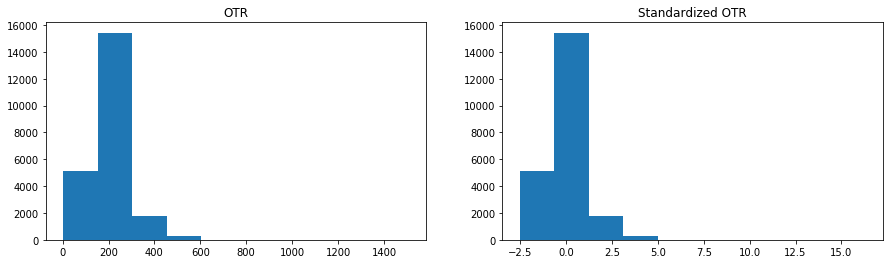

In [103]:
# Visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax1.hist(sample_edit['OTR'])
ax1.set_title('OTR')

ax2.hist(standardized_OTR)
ax2.set_title('Standardized OTR')

plt.show()

In [104]:
ln_OTR = np.log(sample_edit.OTR)
ln_OTR.head()

15249    5.291796
14437    5.107157
24826    5.624378
20552    4.984428
19169    5.475836
Name: OTR, dtype: float64

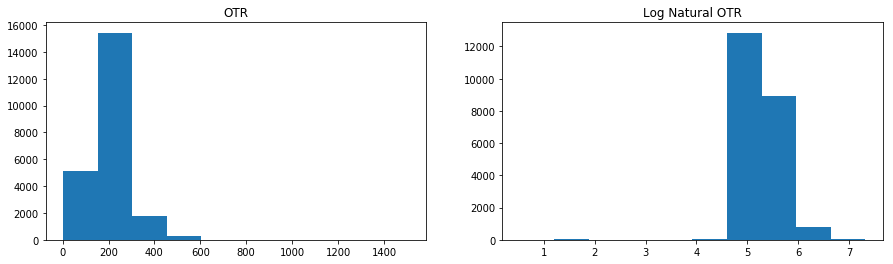

In [105]:
# Visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax1.hist(sample_edit['OTR'])
ax1.set_title('OTR')

ax2.hist(ln_OTR)
ax2.set_title('Log Natural OTR')

plt.show()

### Mendeteksi Outliers

#### Z-Score

In [106]:
z_OTR = copy.deepcopy(standardized_OTR)

In [107]:
[np.abs(z_OTR) > 3]

[15249    False
 14437    False
 24826    False
 20552    False
 19169    False
 5201     False
 19970    False
 27166    False
 22538    False
 7409     False
 18002     True
 2708     False
 17910    False
 97       False
 6468     False
 19268    False
 7191     False
 2099     False
 17078    False
 12585    False
 16051    False
 24801    False
 4270     False
 5514      True
 15530    False
 1192     False
 24616    False
 17602    False
 16453    False
 6086     False
          ...  
 7003     False
 26256    False
 23700    False
 10290    False
 5653     False
 25780    False
 1960     False
 11142    False
 25695    False
 6651     False
 25027    False
 3023     False
 7396     False
 20465    False
 5105     False
 515      False
 5727     False
 10433    False
 20927    False
 3287     False
 10539    False
 21931    False
 96       False
 15947    False
 12775    False
 15593    False
 5304     False
 11350    False
 16683    False
 27029    False
 Name: OTR, Length: 2263

In [108]:
sample_edit[['Kontrak', 'OTR']][np.abs(z_OTR) > 3].head()

,Kontrak,OTR
18002,18003,482.60
5514,5515,504.20
27481,27482,481.80
5335,5336,516.24
27392,27393,455.00


In [109]:
Q1_OTR = sample_edit['OTR'].quantile(0.25)
Q3_OTR = sample_edit['OTR'].quantile(0.75)
IQR_OTR = Q3_OTR - Q1_OTR

In [110]:
sample_edit[['Kontrak', 'OTR']][(sample_edit.OTR < (Q1_OTR - 1.5 * IQR_OTR)) |
                               (sample_edit.OTR > (Q3_OTR + 1.5 * IQR_OTR))].head()

,Kontrak,OTR
18002,18003,482.60
5514,5515,504.20
27481,27482,481.80
5335,5336,516.24
27392,27393,455.00


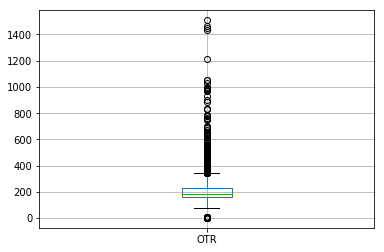

In [111]:
sample_edit.boxplot(column = 'OTR')
plt.show()

### Hypothesis Testing

Menguji perbedaan rata-rata OTR antara kelompok NPF dan tidak NPF. Gunakan level signifikansi sebesar 5%.

In [112]:
from scipy.stats import ttest_ind

In [113]:
x1 = sample_edit['OTR'][sample_edit['NPF'] == 'Ya']
x2 = sample_edit['OTR'][sample_edit['NPF'] != 'Ya']

In [114]:
ttest_ind(x1, x2, equal_var = True) # asumsinya varians sama

Ttest_indResult(statistic=-1.2793470231313475, pvalue=0.20078799629773078)

#### Interpretasi

Karena pvalue > 0,05 maka H0 gagal ditolak, sehingga dapat disimpulkan bahwa rata-rata income kelompok NPF dan tidak NPF tidak berbeda secara signifikan.

In [115]:
print('Deviasi standar x1 = %.3f dan x2 = %.3f' %(x1.std(), x2.std()))

Deviasi standar x1 = 72.470 dan x2 = 86.607


Karena deviasi standar x1 lebih kecil daripada x2 maka kita dapat mengansumsikan variance sama, sehingga diasumsikan variance antara OTR NPF dan tidak NPF sama.

### Grafik Heat Map Total_AR

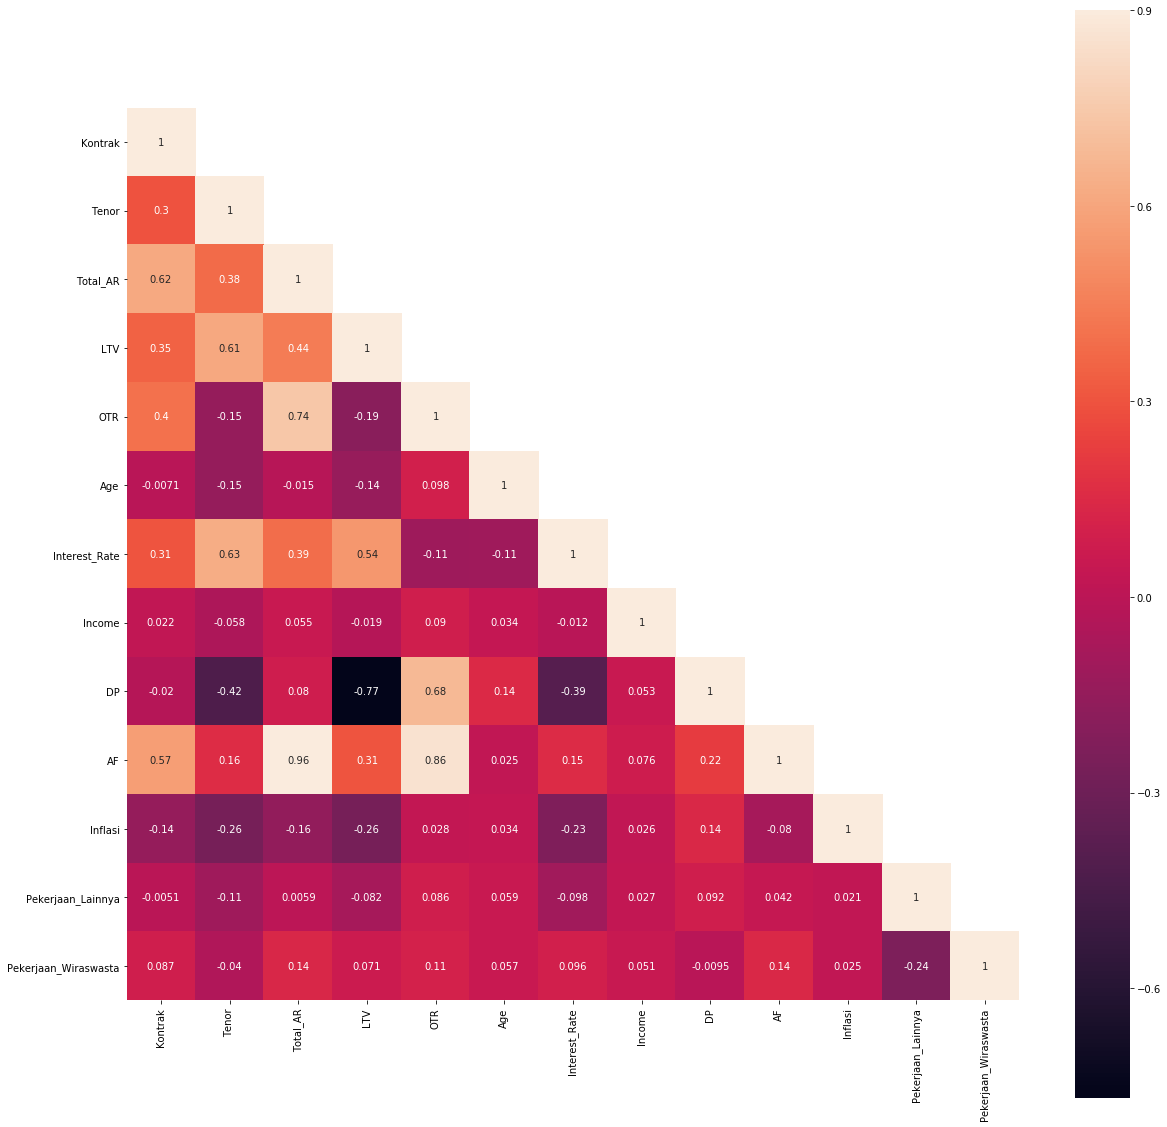

In [116]:
import seaborn as sns

corr = sample_edit.corr(method = 'pearson')
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)
plt.show()

Pada grafik heatmap Total AR memiliki korelasi yang tinggi dengan AF (0.96) dan OTR (0.74).

### Regresi Linear Sederhana

#### Pengaruh AF terhadap Total_AR

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [118]:
# input dataset
x = sample_edit['AF']
y = sample_edit['Total_AR']

In [119]:
# change data structure
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

In [120]:
regressor = LinearRegression()
regressor.fit(x, y) # training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
# regression equation
print('y = %.3f + %.3f X' %(regressor.intercept_, regressor.coef_))

y = 0.053 + 1.312 X


In [122]:
# regression equation
y_pred = regressor.predict(x)
print('R2 = %.3f' %metrics.r2_score(y, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
print('RMSE = %.3f' %rmse)

R2 = 0.912
RMSE = 26.149


R2 yang kecil dan RMSE yang besar menandakan bahwa tidak adanya korelasi pada kedua variable.

#### Pengaruh OTR terhadap Total_AR

In [123]:
# input dataset
x = sample_edit['OTR']
y = sample_edit['Total_AR']

In [124]:
# change data structure
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

In [125]:
regressor = LinearRegression()
regressor.fit(x, y) # training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [126]:
# regression equation
print('y = %.3f + %.3f X' %(regressor.intercept_, regressor.coef_))

y = 48.004 + 0.816 X


In [127]:
# regression equation
y_pred = regressor.predict(x)
print('R2 = %.3f' %metrics.r2_score(y, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
print('RMSE = %.3f' %rmse)

R2 = 0.545
RMSE = 59.573


R2 yang kecil dan RMSE yang besar menandakan bahwa tidak adanya korelasi pada kedua variable.

#### Pengaruh Umur terhadap Income

In [128]:
# input dataset
x = sample_edit['Age']
y = sample_edit['Income']

In [129]:
# change data structure
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

In [130]:
regressor = LinearRegression()
regressor.fit(x, y) # training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [131]:
# regression equation
print('y = %.3f + %.3f X' %(regressor.intercept_, regressor.coef_))

y = 6.775 + 0.322 X


In [132]:
# regression equation
y_pred = regressor.predict(x)
print('R2 = %.3f' %metrics.r2_score(y, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
print('RMSE = %.3f' %rmse)

R2 = 0.001
RMSE = 92.195


R2 yang kecil dan RMSE yang besar menandakan bahwa tidak adanya korelasi pada kedua variable.

### Pemodelan dengan Statsmodels

In [133]:
dmc = pd.read_excel('data microchip.xlsx')

#### Regresi Pengaruh Waktu terhadap Number of Component

In [134]:
ols_sample_edit = smf.ols('Total_AR ~ Income', data = sample_edit).fit()
print(ols_sample_edit.summary())

                            OLS Regression Results                            
Dep. Variable:               Total_AR   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.15
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           9.65e-17
Time:                        23:02:24   Log-Likelihood:            -1.3351e+05
No. Observations:               22634   AIC:                         2.670e+05
Df Residuals:                   22632   BIC:                         2.670e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    213.6761      0.600    356.292      0.0

In [135]:
ols_dmc = smf.ols('number_of_component ~ year_since_1959', data = dmc).fit()
print(ols_dmc.summary())

                             OLS Regression Results                            
Dep. Variable:     number_of_component   R-squared:                       0.719
Model:                             OLS   Adj. R-squared:                  0.626
Method:                  Least Squares   F-statistic:                     7.688
Date:                 Fri, 25 Oct 2019   Prob (F-statistic):             0.0694
Time:                         23:02:24   Log-Likelihood:                -19.423
No. Observations:                    5   AIC:                             42.85
Df Residuals:                        3   BIC:                             42.06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.9434     1

D:\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


#### rmse dari Statsmodels

In [136]:
from statsmodels.tools.eval_measures import rmse

In [137]:
rmse(dmc.number_of_component, ols_dmc.predict(dmc.year_since_1959))

11.770445880527003

In [138]:
rmse(sample_edit.Total_AR, ols_sample_edit.predict(sample_edit.Income))

88.197194891166717